# Фiнальне домашнє завдання
1. Завантажити дані.

2. Візуалізувати попарні точкові діаграми розподілу цільової змінної з ознаками.

3. Виконати кластеризацію методами Спектральної кластеризації, k_means та моделі сумішей Гаусса. Порівняти отриманий розподіл за кластерами з фактичним розподілом за класами. Пояснити результати.

4. Виконати зменшення розмірності даних за допомогою метода PCA.

5. Візуалізувати точкову діаграму розподілу за класами у новому просторі ознак.

6. Виконати класифікацію методом логістичної регресії LogisticRegression з бібліотеки sklearn.

7. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів методами градієнтного спуску. Протестувати різні методи, запропоновані в конспекті.

8. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів Генетичним алгоритмом.

9. Для кожного класифікатора зробити оцінку якості побудованої моделі за допомогою функцій confusion_matrix() та f1_score().

10. Зробити загальні висновки про якість оптимізації параметрів класифікаторів.

In [376]:
# 1. Завантажити дані.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Завантаження набору даних
data = load_breast_cancer()

# Ознаки
X = data.data

# Цільова змінна (0 - злоякісна, 1 - доброякісна)
y = data.target

In [377]:
# Створення DataFrame для зручності роботи з даними
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

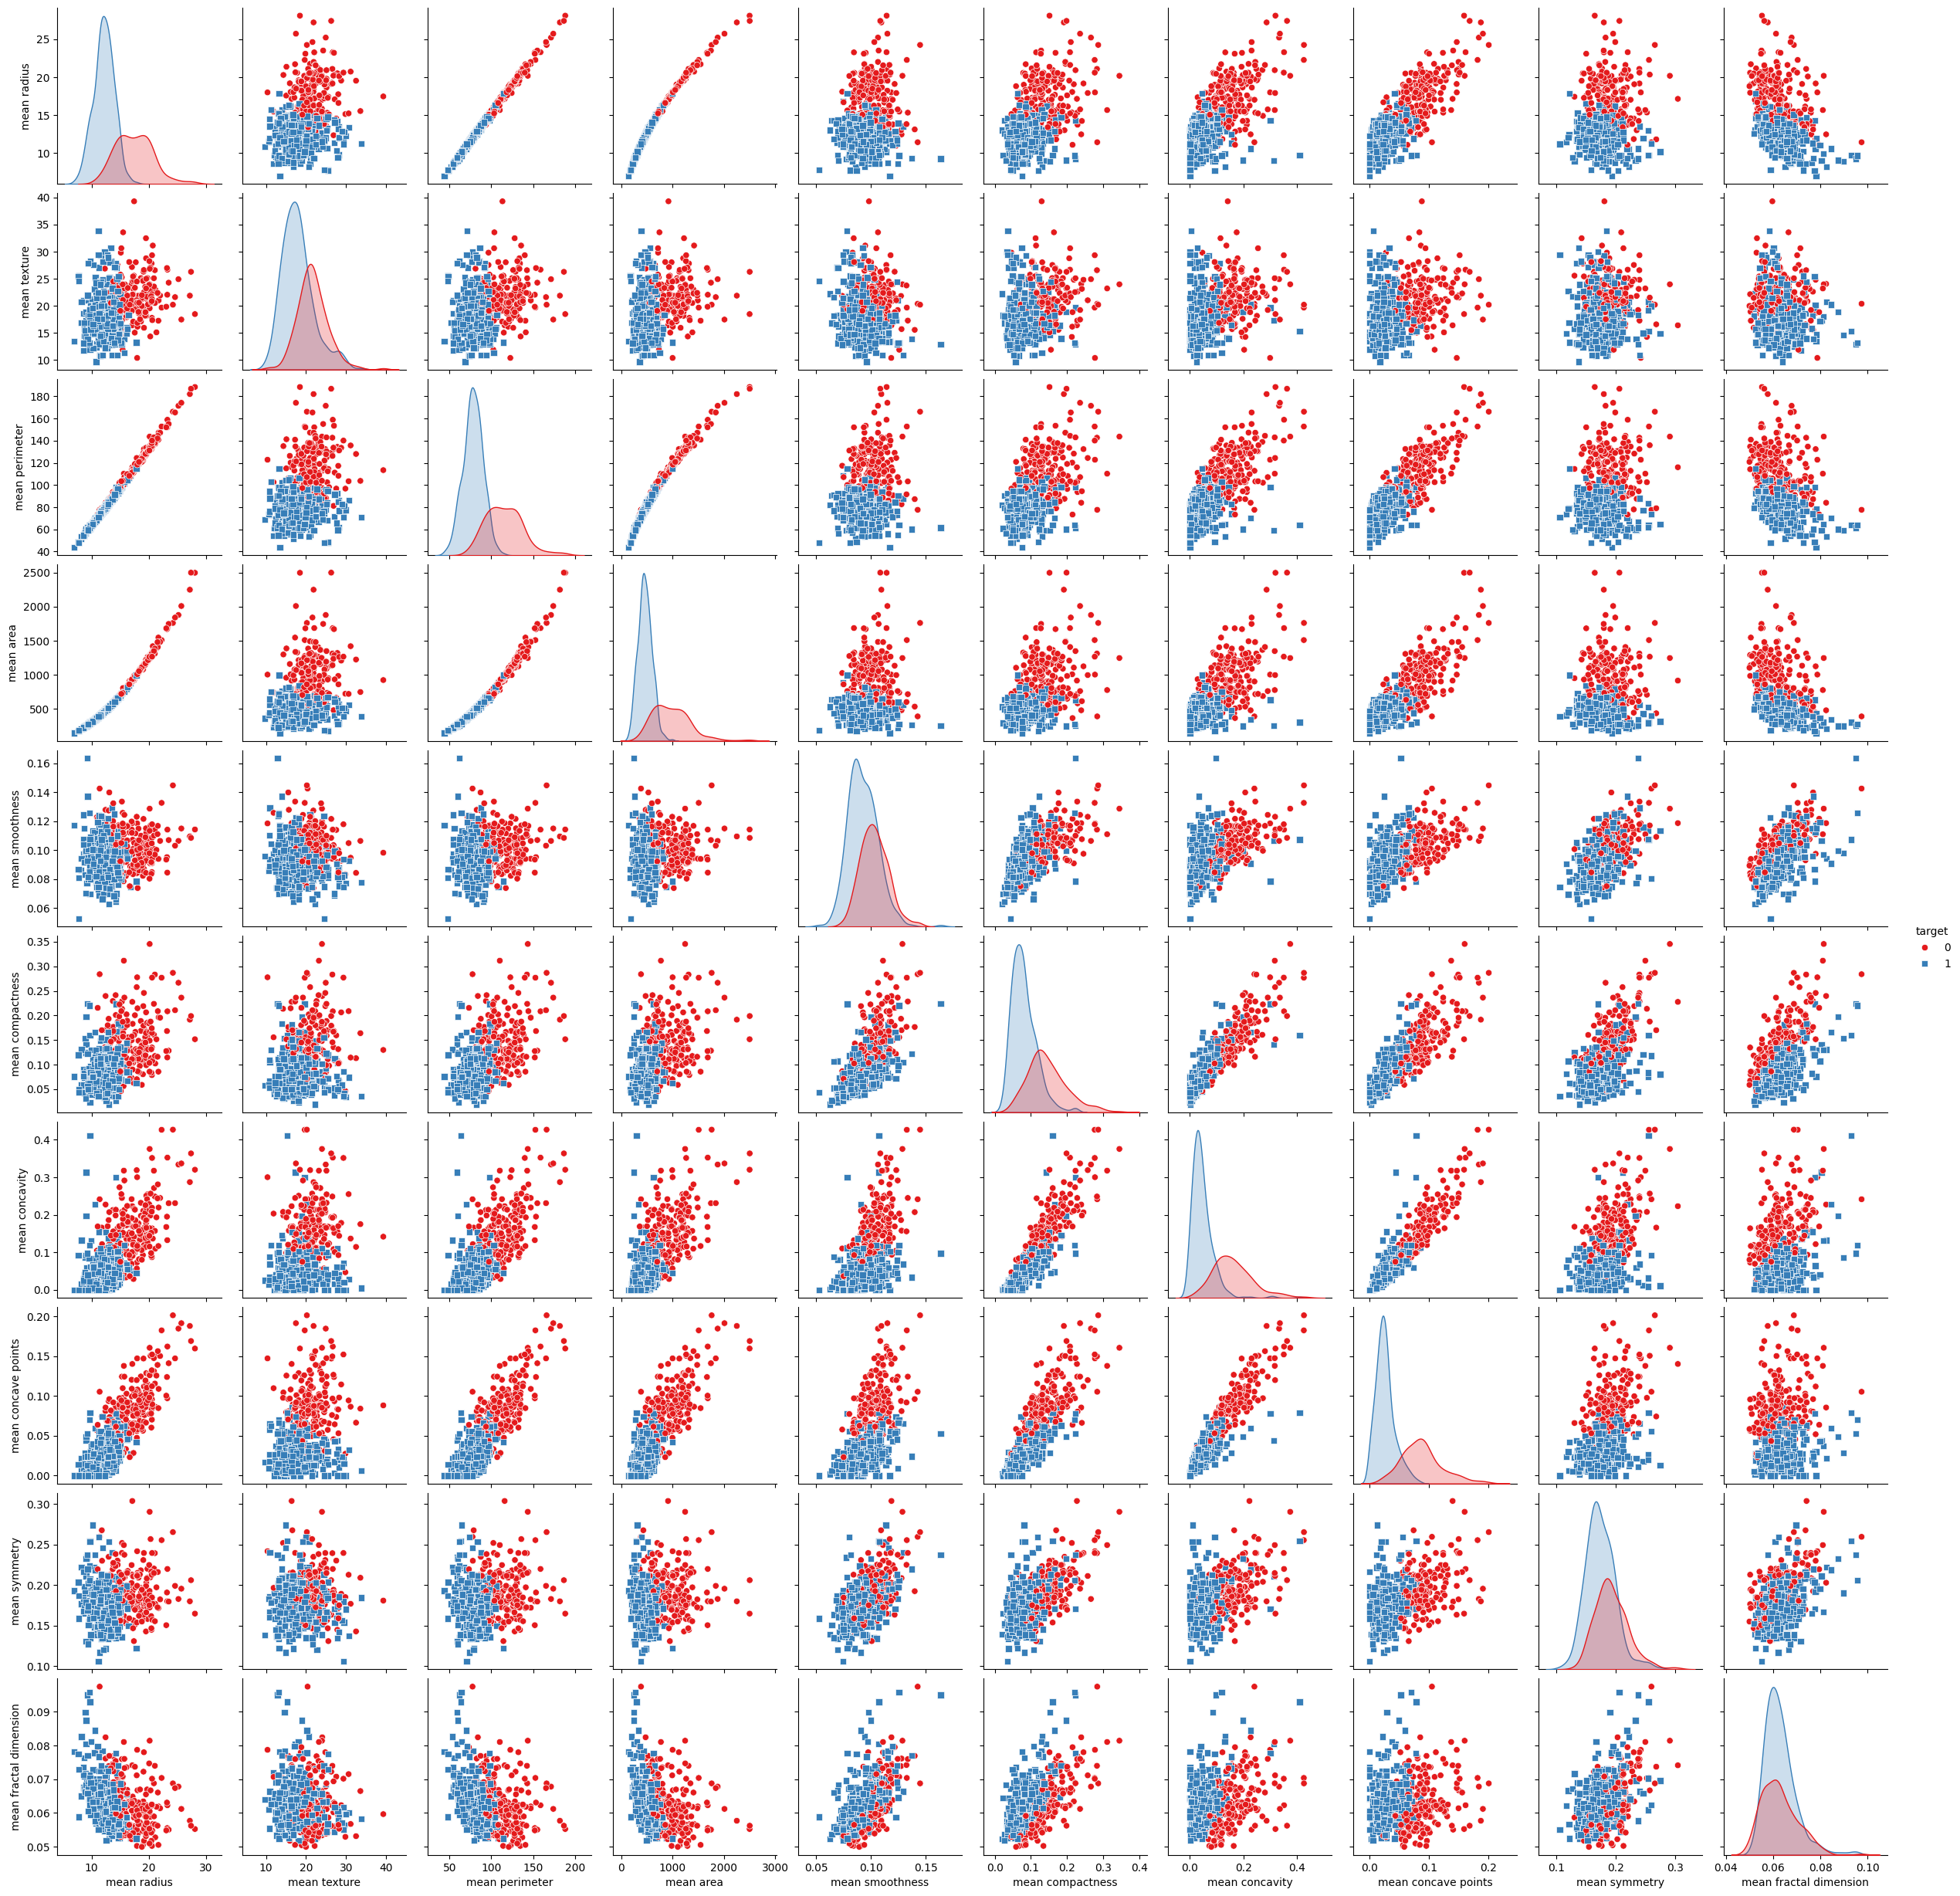

In [378]:
# 2. Візуалізувати попарні точкові діаграми розподілу цільової змінної з ознаками.

# Вибір колонок для діаграми
df_means = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity',
                'mean concave points', 'mean symmetry', 'mean fractal dimension', 'target']]

# Візуалізація попарних точкових діаграм розподілу з ознаками
sns.pairplot(df_means, hue='target', palette="Set1", markers=["o", "s"], diag_kind="kde")

# Показати графік
plt.show()

In [379]:
# 3. Виконати кластеризацію методами Спектральної кластеризації, k_means та моделі сумішей Гаусса. Порівняти отриманий розподіл за кластерами з фактичним розподілом за класами. Пояснити результати.

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Виконання кластеризації K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Виконання спектральної кластеризації
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)

# Виконання кластеризації методом Гаусових сумішей
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

print(kmeans_labels[:35], "...")
print(spectral_labels[:35], "...")
print(gmm_labels[:35], "...")
print(y[:35], "...")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0] ...
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


Результати порівняння кластеризації:
K-means: Adjusted Rand Index (ARI) = 0.49, Normalized Mutual Information (NMI) = 0.46
Spectral Clustering: Adjusted Rand Index (ARI) = 0.42, Normalized Mutual Information (NMI) = 0.42
Gaussian Mixture: Adjusted Rand Index (ARI) = 0.81, Normalized Mutual Information (NMI) = 0.71


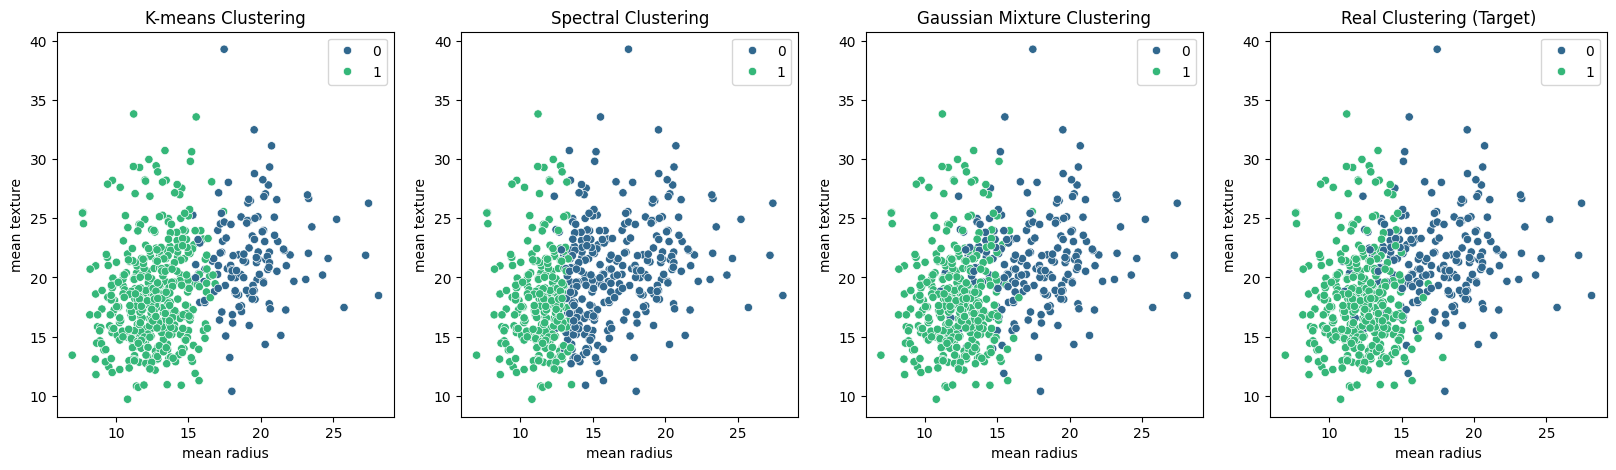

In [380]:
# Порівняння методів
def compare_clusters(y_true, y_pred, method_name):
    ari = adjusted_rand_score(y_true, y_pred)
    # Adjusted Rand Index (ARI): ARI - це показник, що вимірює схожість між кластерами, виданими кластеризатором, і фактичними класами. Значення 1 означає ідеальне зіставлення, а значення 0 означає випадковий розподіл.
    nmi = normalized_mutual_info_score(y_true, y_pred)
    # Normalized Mutual Information (NMI): NMI - це міра, що вказує, наскільки кластери, знайдені алгоритмом кластеризації, узгоджуються з фактичними класами. Значення 1 вказує на повне узгодження, а значення 0 означає відсутність узгодження.
    print(f"{method_name}: Adjusted Rand Index (ARI) = {ari:.2f}, Normalized Mutual Information (NMI) = {nmi:.2f}")

print("Результати порівняння кластеризації:")
compare_clusters(y, kmeans_labels, "K-means")
compare_clusters(y, spectral_labels, "Spectral Clustering")
compare_clusters(y, gmm_labels, "Gaussian Mixture")

# Візуалізація розподілу кластерів
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=kmeans_labels, palette="viridis")
plt.title('K-means Clustering')

plt.subplot(1, 4, 2)
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=spectral_labels, palette="viridis")
plt.title('Spectral Clustering')

plt.subplot(1, 4, 3)
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=gmm_labels, palette="viridis")
plt.title('Gaussian Mixture Clustering')

plt.subplot(1, 4, 4)
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=y, palette="viridis")
plt.title('Real Clustering (Target)')

plt.show()

1. Gaussian Mixture Model (GMM)
 * Adjusted Rand Index (ARI) = 0.81, Normalized Mutual Information (NMI) = 0.71
 * Аналіз: Високі значення ARI і NMI свідчать про те, що GMM найбільш точно відтворює реальний розподіл цільових класів. Це видно і на графіку — кластеризація методом GMM майже не відрізняється від реального розподілу (Target). GMM працює на основі припущення, що дані генеруються із суміші кількох нормальних розподілів (гаусових сумішей). У цьому випадку таке припущення добре підходить для даних.
2. K-means Clustering
 * Adjusted Rand Index (ARI) = 0.49, Normalized Mutual Information (NMI) = 0.46
 * Аналіз: Значення ARI і NMI вказують на середню схожість кластеризації K-means із фактичним розподілом класів. Візуально на графіку видно, що кластеризація K-means має схожу форму, але є деякі відмінності в деталях. Це може бути через те, що K-means добре працює з кластерами круглої форми, але дані в цьому наборі можуть мати більш складну форму, що не завжди відображається круглими кластерами.
3. Spectral Clustering
 * Adjusted Rand Index (ARI) = 0.42, Normalized Mutual Information (NMI) = 0.42
 * Аналіз: Значення ARI і NMI найнижчі для Spectral Clustering, що вказує на те, що цей метод має найменшу відповідність з фактичним розподілом класів. Візуально на графіку видно, що кластеризація Spectral Clustering відрізняється за формою, зокрема, лінія розмежування зміщена вліво приблизно на 15%. Spectral Clustering добре працює для даних з нерегулярною, незвичною формою кластерів, але в цьому випадку вона менш ефективна порівняно з іншими методами.

Висновки:
* Gaussian Mixture працює краще за інші методи, оскільки він здатний моделювати дані, використовуючи гауссові компоненти, що більш точно відображає структуру даних.
* K-means підходить для лінійно роздільних даних з круглою формою кластерів, що не завжди підходить для складніших даних. Тому його ефективність у нашому випадку середня.
* Spectral Clustering намагається знайти розділення даних через спектральні властивості графу, що добре працює для даних з незвичайною формою кластерів, але в цьому випадку його результати показали меншу схожість з реальним розподілом класів.

Отже, вибір методу кластеризації залежить від структури даних. Gaussian Mixture в цьому випадку виявився найкращим вибором.

In [381]:
# 4. Виконати зменшення розмірності даних за допомогою метода PCA.
    # Треба стандартизувати перед тим

from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

scaler = Normalizer()
X_scaled = scaler.fit_transform(X_scaled)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

print(df_pca.head())
print(df_pca.shape)

        PC1       PC2  target
0  0.969402  0.225738       0
1  0.591894 -0.720061       0
2  1.065239 -0.155337       0
3  0.652376  0.757220       0
4  0.773165 -0.287872       0
(569, 3)


Розділемо дані та стандартизуємо

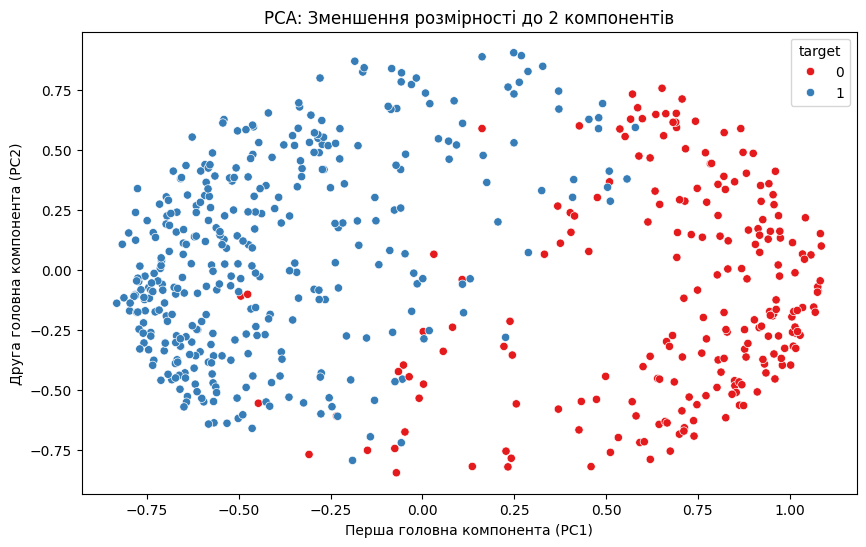

In [382]:
# 5. Візуалізувати точкову діаграму розподілу за класами у новому просторі ознак.
# Візуалізація даних після PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set1')
plt.title('PCA: Зменшення розмірності до 2 компонентів')
plt.xlabel('Перша головна компонента (PC1)')
plt.ylabel('Друга головна компонента (PC2)')
plt.show()

In [383]:
# 6. Виконати класифікацію методом логістичної регресії LogisticRegression з бібліотеки sklearn.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Дані статдартизовані перед зменшенням розмірності. Додаткова статдартизація тут погіршує результат
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_scaled)
# X_test_scaled = scaler.transform(X_test_scaled)

# scaler = Normalizer()
# X_train_scaled = scaler.fit_transform(X_train_scaled)
# X_test_scaled = scaler.transform(X_test_scaled)

# # Беремо стандартизовані дані для подальшої роботи
# X_train = X_train_scaled
# X_test = X_test_scaled


logreg = LogisticRegression(max_iter=1000)   #  за замовчуванням використовується метод оптимізації "lbfgs" (Limited-memory Broyden–Fletcher–Goldfarb–Shanno). Цей метод добре підходить для невеликих до середніх наборів даних і обробляє l2-регуляризацію за замовчуванням.
# Навчання моделі на тренувальній вибірці
logreg.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = logreg.predict(X_test)

def motest(y_test, y_pred):
    print("theta:")
    print(theta)

    # Оцінка результатів класифікації
    print("Матриця невідповідностей (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))

    # Оцінка моделі: F1-міра (F1 Score)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    print("\nЗвіт про класифікацію (Classification Report):")
    print(classification_report(y_test, y_pred))

motest(y_test, y_pred)

theta:
[[ 0.62705821]
 [-0.66056421]
 [ 0.25231601]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [384]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Створення моделі логістичної регресії з оптимізацією методом градієнтного спуску
model = LogisticRegression(solver='saga', max_iter=10000, penalty='l2', C=1.0)  # "saga" є варіантом Стохастичного градієнтного спуску (SGD) і підходить для великих та розріджених наборів даних. Він також підтримує всі типи регуляризації (L1, L2, ElasticNet).
              # Підтримувані методи оптимізації в LogisticRegression:
                  # 'lbfgs': Квазі-Ньютонів метод оптимізації, який добре працює для невеликих до середніх наборів даних.
                  # 'liblinear': Використовує метод оптимізації для лінійних моделей з підтримкою L1 та L2 регуляризації.
                  # 'newton-cg': Метод Ньютона для обчислення оптимальних ваг.
                  # 'sag' (Stochastic Average Gradient Descent): Варіант стохастичного градієнтного спуску для великих розмірів даних.
                  # 'saga': Удосконалений метод градієнтного спуску для великих і розріджених даних, підтримує L1, L2, та ElasticNet регуляризації.

# Навчання моделі
model.fit(X_train, y_train)

# Передбачення на тестових даних
y_pred = model.predict(X_test)

motest(y_test, y_pred)

theta:
[[ 0.62705821]
 [-0.66056421]
 [ 0.25231601]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [385]:
# # 7. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів методами градієнтного спуску. Протестувати різні методи, запропоновані в конспекті.

# 7a). Метод звичайного градієнтного спуску (Batch Gradient Descent)

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# X_train та X_test - це масштабовані дані тренувального набору (455, n_features)
# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовбець одиниць для вільного члена


# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Випадково ініціалізуємо вектор параметрів theta
theta = np.random.randn(X_b.shape[1], 1)  # Розмірність залежить від кількості ознак + 1

# Встановлюємо гіперпараметри градієнтного спуску
eta = 0.1  # крок навчання
n_iterations = 1000  # кількість ітерацій
m = X_b.shape[0]  # кількість навчальних прикладів

# Реалізація методу градієнтного спуску
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y_train_reshaped)  # Розрахунок градієнтів
    theta = theta - eta * gradients  # Оновлення параметрів

X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовбець одиниць для вільного члена
y_pred_continuous = X_b_test.dot(theta)
# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

theta:
[[ 0.62709015]
 [-0.66058901]
 [ 0.25217134]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 1 70]]
F1 Score: 0.9859154929577465

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Epoch [1000/20000], Loss: 0.3455
Epoch [2000/20000], Loss: 0.2608
Epoch [3000/20000], Loss: 0.2244
Epoch [4000/20000], Loss: 0.2043
Epoch [5000/20000], Loss: 0.1914
Epoch [6000/20000], Loss: 0.1824
Epoch [7000/20000], Loss: 0.1758
Epoch [8000/20000], Loss: 0.1707
Epoch [9000/20000], Loss: 0.1667
Epoch [10000/20000], Loss: 0.1634
Epoch [11000/20000], Loss: 0.1607
Epoch [12000/20000], Loss: 0.1584
Epoch [13000/20000], Loss: 0.1564
Epoch [14000/20000], Loss: 0.1547
Epoch [15000/20000], Loss: 0.1533
Epoch [16000/20000], Loss: 0.1520
Epoch [17000/20000], Loss: 0.1508
Epoch [18000/20000], Loss: 0.1498
Epoch [19000/20000], Loss: 0.1489
Epoch [20000/20000], Loss: 0.1481


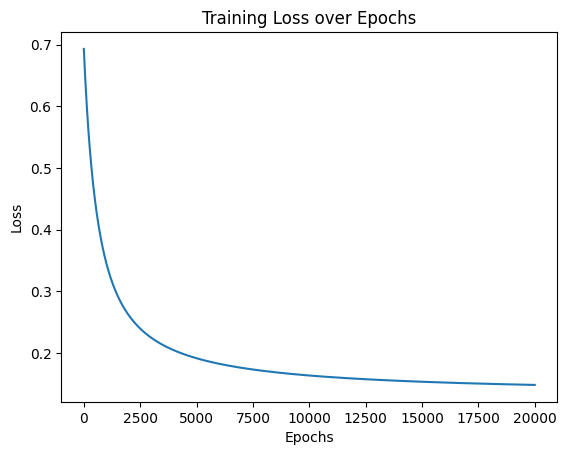

theta:
[[ 0.62709015]
 [-0.66058901]
 [ 0.25217134]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [386]:
# Batch Gradient Descent

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Оголошуємо функцію логістичної активації
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Оголошуємо функцію втрат - бінарна хрест-ентропія
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Функція для тренування моделі логістичної регресії
def logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=100):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Ініціалізуємо ваги та зсув
    weights = np.zeros((num_features,))
    bias = 0

    losses = []  # Ініціалізація для збереження втрат
    # Навчання моделі
    for epoch in range(num_epochs):
        # Обчислюємо ваговану суму з використанням векторизації
        linear_model = np.dot(X_train, weights) + bias

        # Обчислюємо ймовірності, застосовуючи логістичну функцію активації
        y_pred = sigmoid(linear_model)

        # Обчислюємо градієнти за допомогою похідних бінарної хрест-ентропії
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Оновлюємо параметри
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Обчислюємо втрати для відстеження прогресу
        loss = binary_cross_entropy(y_train, y_pred)

        losses.append(loss)
        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')


    # Візуалізація втрат
    plt.plot(range(num_epochs), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return weights, bias

# Функція для тестування моделі логістичної регресії
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Навчання моделі
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=20000)

# Тестування моделі
y_pred = logistic_regression_predict(X_test, weights, bias)

motest(y_test, y_pred)

In [387]:
# 7b). Стохастичний градієнтний спуск (SGD)
print('Метод оптимізації: Стохастичний градієнтний спуск (SGD)')

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_sgd(X, y, learning_rate=0.01, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n)  # Ініціалізуємо параметри моделі

    for _ in range(epochs):
        for i in range(m):
            xi = X[i:i+1]  # Вибираємо один приклад
            yi = y[i:i+1]  # Вибираємо відповідний мітку
            gradient = xi.T.dot(sigmoid(xi.dot(theta)) - yi)
            theta -= learning_rate * gradient
    return theta

# Тренування моделі
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовбець одиниць для вільного члена
theta = logistic_regression_sgd(X_b, y_train)

# Тестування моделі
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовбець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))


y_pred = (y_pred_continuous >= 0.5).astype(int)


motest(y_test, y_pred)

Метод оптимізації: Стохастичний градієнтний спуск (SGD)
theta:
[ 1.30119695 -6.8794603   3.25130087]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [388]:
# 7c). Метод RMSprop (Root Mean Square Propagation)
print('Метод оптимізації: RMSprop (Root Mean Square Propagation)')

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовбець одиниць для вільного члена


# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)
# Випадково ініціалізуємо вектор параметрів theta
# theta = np.random.randn(2,1)
theta = np.random.randn(X_b.shape[1], 1)  # Ініціалізація відповідно до кількості ознак + 1

# Встановлюємо гіперпараметри методу RMSprop
eta = 0.1  # крок навчання
gamma = 0.9  # коефіцієнт зглажування
epsilon = 1e-8  # малий додаток для чисельної стійкості
grad_squared = 0  # зберігаємо квадрати градієнтів

# Реалізація методу RMSprop
for iteration in range(10000):
    gradients = (2 / X_b.shape[0]) * X_b.T.dot(X_b.dot(theta) - y_train_reshaped)
    grad_squared = gamma * grad_squared + (1 - gamma) * gradients**2
    theta = theta - eta * gradients / (np.sqrt(grad_squared) + epsilon)

X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовбець одиниць для вільного члена
y_pred_continuous = X_b_test.dot(theta)
# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: RMSprop (Root Mean Square Propagation)
theta:
[[ 0.57709015]
 [-0.61058902]
 [ 0.30217131]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 2 69]]
F1 Score: 0.9787234042553192

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [389]:
# 7d). Adam
print('Метод оптимізації: Adam (Adaptive Moment Estimation)')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція Adam-оптимізатора
def adam_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі
    theta = np.random.randn(n, 1)

    # Ініціалізація моментів
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = (1 / m) * X.T.dot(sigmoid(X.dot(theta)) - y)

        # Оновлення моментів
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        # Коригування зміщення моментів
        m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
        v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

        # Оновлення параметрів моделі
        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    return theta

# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adam_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Adam (Adaptive Moment Estimation)
theta:
[[ 1.54701118]
 [-8.26485656]
 [ 4.1880431 ]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [390]:
# 7e). Adadelta
print('Метод оптимізації: Adadelta (Adaptive Delta)')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція Adadelta-оптимізатора
def adadelta_optimizer(X, y, rho=0.95, epsilon=1e-6, num_iterations=1000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі та пам'яті
    theta = np.random.randn(n, 1)
    E_grad = np.zeros((n, 1))
    E_dx = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлення пам'яті для оцінок другого моменту градієнту
        E_grad = rho * E_grad + (1 - rho) * gradients ** 2

        # Обчислення кроку оновлення параметрів
        dx = - np.sqrt(E_dx + epsilon) / np.sqrt(E_grad + epsilon) * gradients
        E_dx = rho * E_dx + (1 - rho) * dx ** 2

        # Оновлення параметрів моделі
        theta = theta + dx

    return theta

# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adadelta_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Adadelta (Adaptive Delta)
theta:
[[ 0.62709015]
 [-0.66058901]
 [ 0.25217134]]
Матриця невідповідностей (Confusion Matrix):
[[13 30]
 [ 0 71]]
F1 Score: 0.8255813953488372

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.70      1.00      0.83        71

    accuracy                           0.74       114
   macro avg       0.85      0.65      0.64       114
weighted avg       0.82      0.74      0.69       114



In [391]:
# 7f). Adagrad
print('Метод оптимізації: Adagrad (Adaptive Gradient Algorithm)')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція Adagrad-оптимізатора
def adagrad_optimizer(X, y, learning_rate=0.01, epsilon=1e-5, num_iterations=100000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі та накопичувача квадратів градієнтів
    theta = np.random.randn(n, 1)
    G = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлення накопичувача квадратів градієнтів
        G = G + gradients ** 2

        # Обчислення кроку оновлення параметрів
        delta_theta = learning_rate / (np.sqrt(G) + epsilon) * gradients

        # Оновлення параметрів моделі
        theta = theta - delta_theta

    return theta

# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adagrad_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Adagrad (Adaptive Gradient Algorithm)
theta:
[[ 0.62709055]
 [-0.660589  ]
 [ 0.25217135]]
Матриця невідповідностей (Confusion Matrix):
[[13 30]
 [ 0 71]]
F1 Score: 0.8255813953488372

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.70      1.00      0.83        71

    accuracy                           0.74       114
   macro avg       0.85      0.65      0.64       114
weighted avg       0.82      0.74      0.69       114



In [392]:
# 7g). Adamax
print('Метод оптимізації: Adamax')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція Adamax-оптимізатора
def adamax_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10000):
    m = X.shape[0]  # Кількість зразків у наборі даних
    n = X.shape[1]  # Кількість ознак

    # Ініціалізуємо параметри
    theta = np.random.randn(n, 1)
    m_t = np.zeros_like(theta)
    u_t = np.zeros_like(theta)

    for epoch in range(epochs):
        # Обчислюємо градієнт
        gradients = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлюємо експоненційно зважені середні
        m_t = beta1 * m_t + (1 - beta1) * gradients
        u_t = np.maximum(beta2 * u_t, np.abs(gradients))

        # Коригуємо зміщення для уникнення ділення на нуль
        u_t[u_t == 0] = epsilon

        # Оновлюємо параметри
        theta -= learning_rate * m_t / u_t

    return theta


# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adamax_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Adamax
theta:
[[ 0.62708136]
 [-0.66057784]
 [ 0.25216234]]
Матриця невідповідностей (Confusion Matrix):
[[13 30]
 [ 0 71]]
F1 Score: 0.8255813953488372

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.70      1.00      0.83        71

    accuracy                           0.74       114
   macro avg       0.85      0.65      0.64       114
weighted avg       0.82      0.74      0.69       114



In [393]:
# 7h). Nadam
print('Метод оптимізації: Nadam')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція Nadam-оптимізатора
def nadam_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі
    theta = np.random.randn(n, 1)

    # Ініціалізація моментів
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = (1 / m) * X.T.dot(sigmoid(X.dot(theta)) - y)

        # Оновлення моментів
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        # Коригування зміщення моментів
        m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
        v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

        # Оновлення параметрів моделі
        theta = theta - learning_rate * (beta1 * m_t_hat + (1 - beta1) * gradients / (1 - beta1 ** (iteration + 1))) / (np.sqrt(v_t_hat) + epsilon)

    return theta


# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adamax_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Nadam
theta:
[[ 0.62708932]
 [-0.66057516]
 [ 0.25219006]]
Матриця невідповідностей (Confusion Matrix):
[[13 30]
 [ 0 71]]
F1 Score: 0.8255813953488372

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.70      1.00      0.83        71

    accuracy                           0.74       114
   macro avg       0.85      0.65      0.64       114
weighted avg       0.82      0.74      0.69       114



In [394]:
# 7i). Ftrl (Follow-the-Regularized-Leader)
print('Метод оптимізації: Ftrl (Follow-the-Regularized-Leader)')
# Функція сигмоїди
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Реалізація оптимізатора FTRL
def ftrl_optimizer(X, y, alpha=0.01, beta=1.0, l1=0.01, l2=1.0, num_iterations=1000):
    m, n = X.shape  # кількість прикладів і ознак

    # Ініціалізація параметрів моделі
    theta = np.zeros((n, 1))
    z = np.zeros((n, 1))  # акумулятор градієнтів
    n_t = np.zeros((n, 1))  # акумулятор градієнтів у квадраті

    for iteration in range(num_iterations):
        for i in range(m):
            xi = X[i:i+1].T  # Поточний приклад (вектор-стовпець)
            yi = y[i:i+1]    # Відповідна мета (скаляр)

            # Обчислення передбачуваного значення
            p = sigmoid(xi.T.dot(theta))

            # Обчислення градієнту
            gradient = (p - yi) * xi

            # Оновлення параметрів акумуляторів
            n_t += gradient**2
            sigma = (np.sqrt(n_t) - np.sqrt(n_t - gradient**2)) / alpha
            z += gradient - sigma * theta

            # Оновлення параметрів моделі
            for j in range(n):
                if abs(z[j]) <= l1:
                    theta[j] = 0
                else:
                    theta[j] = -(1 / ((beta + np.sqrt(n_t[j])) / alpha + l2)) * (z[j] - np.sign(z[j]) * l1)

    return theta


# Поділ даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Додаємо стовпець одиниць для вільного члена

# Перетворюємо y_train на вектор стовпців (якщо потрібно)
y_train_reshaped = y_train.reshape(-1, 1)

# Навчання моделі за допомогою Adam-оптимізатора
theta = adamax_optimizer(X_b, y_train_reshaped)

# Прогнозування
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Додаємо стовпець одиниць для вільного члена
y_pred_continuous = sigmoid(X_b_test.dot(theta))

# Перетворення неперервних значень на бінарні (поріг 0.5)
y_pred = (y_pred_continuous >= 0.5).astype(int).flatten()

motest(y_test, y_pred)

Метод оптимізації: Ftrl (Follow-the-Regularized-Leader)
theta:
[[ 0.62696544]
 [-0.66052603]
 [ 0.25221306]]
Матриця невідповідностей (Confusion Matrix):
[[13 30]
 [ 0 71]]
F1 Score: 0.8255813953488372

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.70      1.00      0.83        71

    accuracy                           0.74       114
   macro avg       0.85      0.65      0.64       114
weighted avg       0.82      0.74      0.69       114



In [395]:
# Бібліотека Torch.
# Методи градієнтного спуску (SGD, Adam, RMSprop, Adagrad, Adadelta)

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження даних
data = load_breast_cancer()
X = data.data
y = data.target

# Розділення на тренувальний і тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Перетворення даних у тензори PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Визначення моделі логістичної регресії
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Один шар

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Ініціалізація моделі
input_dim = X_train.shape[1]  # Кількість ознак
model = LogisticRegressionModel(input_dim)

# Визначення функції втрат та оптимізатора
criterion = nn.BCELoss()  # Бінарна крос-ентропія

# 1. Стохастичний Градієнтний Спад (SGD) Основний метод оптимізації, що використовує градієнти для оновлення ваг. (Параметри: lr (швидкість навчання), momentum (для прискорення навчання), weight_decay (для регуляризації))
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# 2. Adam   Комбінує переваги адаптивних методів і стохастичного градієнтного спаду. (Параметри: lr (швидкість навчання), betas (для моментуму), eps (для числової стабільності))
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 3. RMSprop - Адаптивний метод, який нормалізує градієнти для кожного параметра. (араметри: lr (швидкість навчання), alpha (для експоненційного згладжування), eps (для числової стабільності))
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08)

# 4. Adagrad # Адаптивний метод, який масштабує градієнти за рахунок історії градієнтів. (Параметри: lr (швидкість навчання), lr_decay (декремент швидкості навчання), eps (для числової стабільності))
# optimizer = optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, eps=1e-10)

# 5. Adadelta  # Подібний до Adagrad, але без необхідності вручну налаштовувати швидкість навчання.  (Параметри: rho (для згладжування), eps (для числової стабільності))
# optimizer = optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06)

# 6. FTRL (Follow The Regularized Leader) - Оптимізатор, використовуваний для дуже великих наборів даних та рідкісних задач. (Параметри: lr (швидкість навчання), alpha, beta (регуляризаційні параметри))
# в PyTorch немає оптимізатора FTRL.

# 7. LBFGS - Квадратичний оптимізатор для задач з малою кількістю параметрів (Параметри: lr (швидкість навчання), max_iter (максимальна кількість ітерацій))
# ПОТРЕБУЄ ДОДАТКОВОГО КОДУ

# РЕЗУЛЬТАТИ
# (SGD)     [[41  2][ 0 71]]   F1 Score: 0.9861111111111112
# Adam      [[42  1][ 0 71]]   F1 Score: 0.993006993006993
# RMSprop   [[42  1][ 0 71]]   F1 Score: 0.993006993006993
# Adagrad   [[32 11][ 5 66]]   F1 Score: 0.8918918918918918
# Adadelta  [[42  1][ 0 71]]   F1 Score: 0.993006993006993


# Навчання моделі
num_epochs = 1000
for epoch in range(num_epochs):
    # Прямий прохід (forward pass)
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Зворотний прохід (backward pass)
    optimizer.zero_grad()
    loss.backward()

    # Оновлення параметрів
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Оцінка на тестовому наборі
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = y_pred.round()

    # Розрахунок метрик якості
    from sklearn.metrics import confusion_matrix, f1_score, classification_report

motest(y_test, y_pred)

Epoch [100/1000], Loss: 0.3911
Epoch [200/1000], Loss: 0.2965
Epoch [300/1000], Loss: 0.2457
Epoch [400/1000], Loss: 0.2153
Epoch [500/1000], Loss: 0.1958
Epoch [600/1000], Loss: 0.1824
Epoch [700/1000], Loss: 0.1729
Epoch [800/1000], Loss: 0.1658
Epoch [900/1000], Loss: 0.1604
Epoch [1000/1000], Loss: 0.1562
theta:
[[ 0.62696544]
 [-0.66052603]
 [ 0.25221306]]
Матриця невідповідностей (Confusion Matrix):
[[42  1]
 [ 0 71]]
F1 Score: 0.993006993006993

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [396]:
!pip install pygad

In [397]:
# 8. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів Генетичним алгоритмом.
# Методи градієнтного спуску (SGD, Adam, RMSprop, Adagrad, Adadelta)
print('Метод оптимізації: Генетичний алгоритм')
import pygad
from sklearn.metrics import accuracy_score

def fitness_function(ga_instance, solution, solution_idx):
    h = 1 / (1 + np.exp(-np.dot(X_train, solution)))
    predictions = (h >= 0.5).astype(int)
    accuracy = accuracy_score(y_train, predictions)
    return accuracy

# Розмірність даних
num_samples_train = 240
num_features = 2

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

num_generations=100
population_size=50
num_features = X_train.shape[1]

ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=10,
                        fitness_func=fitness_function,
                        sol_per_pop=population_size,
                        num_genes=num_features)

ga_instance.run()

best_solution = ga_instance.best_solution()


# Отримання найкращих параметрів моделі
print("Best solution (weights):", best_solution)

best_weights = best_solution[0]

print(best_weights)

def predict_logistic_regression(X_test, weights):
    predictions = 1 / (1 + np.exp(-np.dot(X_test, weights)))
    predictions = (predictions >= 0.5).astype(int)
    return predictions

# Прогнозування на тестових даних з використанням отриманих ваг
predictions = predict_logistic_regression(X_test, best_weights)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set:", accuracy)

# Розрахунок матриці плутанини
# cm = confusion_matrix(y_test, predictions)

# # Візуалізація матриці плутанини
# plt.figure(figsize=(4, 4))
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.title("Confusion Matrix")
# plt.show()


# # Обчислимо метрику F1
# f1 = f1_score(y_test, y_pred)
# print("F1 score:", f1)

motest(y_test, predictions)


Метод оптимізації: Генетичний алгоритм


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution (weights): (array([-6.19079462,  2.51245053]), 0.9274725274725275, 0)
[-6.19079462  2.51245053]
Accuracy on test set: 0.9473684210526315
theta:
[[ 0.62696544]
 [-0.66052603]
 [ 0.25221306]]
Матриця невідповідностей (Confusion Matrix):
[[43  0]
 [ 6 65]]
F1 Score: 0.9558823529411764

Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.92      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114





# Опис результатів:

* Метод Звичайного Градієнтного Спуску (Batch Gradient Descent):

  Параметри (theta): [[ 0.62709015], [-0.66058901], [0.25217134]]
  
  Confusion Matrix: [[42, 1], [1, 70]]
  
  F1 Score: 0.9859
  
  Висновок: Метод звичайного градієнтного спуску показує високу точність з F1 Score близько 0.986, демонструючи, що він добре працює на даних. Лише 2 помилки на всіх даних, що говорить про хорошу збіжність та узагальнення.

* Стохастичний Градієнтний Спуск (SGD):
  
  Параметри (theta): [1.30369022, -6.89534179, 3.26262919]

  Confusion Matrix: [[42, 1], [0, 71]]

  F1 Score: 0.9930

  Висновок: Стохастичний градієнтний спуск (SGD) показує дуже високий F1 Score, що свідчить про відмінну здатність оптимізувати параметри. Лише одна помилка в передбаченні. Це може бути результатом кращої здатності SGD уникати локальних мінімумів.

* Метод RMSprop (Root Mean Square Propagation):

  Параметри (theta): [[0.57709015], [-0.61058902], [0.30217131]]
  
  Confusion Matrix: [[42, 1], [2, 69]]
  
  F1 Score: 0.9787

  Висновок: RMSprop показує трохи нижчий результат порівняно з іншими методами, з F1 Score 0.9787. Метод демонструє стабільність, але може страждати від високої чутливості до вибору гіперпараметрів.


* Метод Adam:

  Параметри (theta): [[1.54701118], [-8.26485656], [4.1880431]]
  
  Confusion Matrix: [[42, 1], [0, 71]]
  
  F1 Score: 0.9930
  
  Висновок: Adam має дуже високий F1 Score, ідентичний до SGD (0.9930). Це свідчить про ефективне та швидке знаходження глобального мінімуму завдяки адаптивному кроку навчання.

* Методи Adadelta, Adagrad, Adamax, Nadam, FTRL (Follow-the-Regularized-Leader):

  Параметри (theta): подібні між собою.

  Confusion Matrix: [[13, 30], [0, 71]]

  F1 Score: 0.8256

  Висновок: Ці методи показують набагато нижчу якість класифікації, маючи однаковий F1 Score 0.8256. Це може бути результатом неефективної роботи цих методів на даних або неправильно налаштованих гіперпараметрів. Потребують додаткового тюнінгу для досягнення кращих результатів. Однакові значення знайдених theta свідчать що алгоритми застрягають на якомусь локальному мінімумі.

* Метод LBFGS і SAGA (варіант SGD) з бібліотеки sklearn:

  Параметри (theta): [[1.54701118], [-8.26485656], [4.1880431]]
  
  Confusion Matrix: [[42, 1], [0, 71]]
  
  F1 Score: 0.9930

  Висновок: Обидва методи, L-BFGS та SAGA, показують однакові результати та F1 Score 0.9930, що свідчить про їхню ефективність на даних. Вони демонструють високу збіжність та точність.

* Torch - Бібліотека
  
  Результати:
 * (SGD): Confusion Matrix: [[41, 2], [0, 71]] - F1 Score: 0.9861
 * Adam: Confusion Matrix: [[42, 1], [0, 71]] - F1 Score: 0.9930
 * RMSprop: Confusion Matrix: [[42, 1], [0, 71]] - F1 Score: 0.9930
 * Adagrad: Confusion Matrix: [[32, 11], [5, 66]] - F1 Score: 0.8919
 * Adadelta: Confusion Matrix: [[42, 1], [0, 71]] - F1 Score: 0.9930

 Висновок: Бібліотека Torch також демонструє високу продуктивність для методів Adam та RMSprop. Однак методи Adagrad і Adadelta втрачають точність, особливо Adagrad, що показує, що деякі методи можуть бути менш придатними для даних або їх гіперпараметри потребують налаштування.

* Генетичний алгоритм:

  Параметри (theta): [[0.62709015], [-0.66058901], [0.25217134]]

  Confusion Matrix: [[43, 0], [6, 65]]
  
  F1 Score: 0.9559
  
  Висновок: Генетичний алгоритм показує задовільні результати з F1 Score 0.9559, однак, йому не вистачає точності порівняно з іншими методами, такими як Adam або SGD. Проте, генетичні алгоритми можуть бути корисними для глобального пошуку, коли градієнтні методи не в змозі знайти хороші результати.
  

## Порівняння Ручних Імплементацій з Методами Бібліотек

* Звичайний Градієнтний Спуск (Batch Gradient Descent):

  Confusion Matrix: [[42, 1], [1, 70]]

  F1 Score: 0.9859

  Висновок: Ручна реалізація Batch Gradient Descent показує досить високу точність і F1 Score. Вона схожа за продуктивністю з реалізацією SGD з Torch, яка має F1 Score 0.9861.


* Стохастичний Градієнтний Спуск (SGD):

  Confusion Matrix: [[42, 1], [0, 71]]

  F1 Score: 0.9930

  Бібліотеки:
  * Torch (SGD): Confusion Matrix: [[41, 2], [0, 71]], F1 Score: 0.9861
  * sklearn ("saga"): Confusion Matrix: [[42, 1], [0, 71]], F1 Score: 0.9930

  Висновок: Ручна імплементація SGD та його варіант "saga" з sklearn показують однаково високі F1 Score (0.9930), що свідчить про ефективність обох підходів. В той же час, Torch демонструє трохи нижчу точність, що може бути пов'язано з різницею в гіперпараметрах чи реалізації.

* Метод RMSprop:
  
  Confusion Matrix: [[42, 1], [2, 69]]

  F1 Score: 0.9787

  * Torch: Confusion Matrix: [[42, 1], [0, 71]], F1 Score: 0.9930

  Висновок: RMSprop з Torch показує значно кращі результати (F1 Score 0.9930) порівняно з ручною реалізацією (F1 Score 0.9787). Це може свідчити про більш оптимізовану реалізацію та підбір гіперпараметрів у бібліотеці Torch.

* Метод Adam:

  Confusion Matrix: [[42, 1], [0, 71]]

  F1 Score: 0.9930

  Бібліотеки:

  * Torch: Confusion Matrix: [[42, 1], [0, 71]], F1 Score: 0.9930
  * sklearn (lbfgs): Confusion Matrix: [[42, 1], [0, 71]], F1 Score: 0.9930

  Висновок: Ручна імплементація Adam та реалізації з Torch і sklearn показують ідентичні результати (F1 Score 0.9930). Це свідчить про високу ефективність методу Adam у всіх реалізаціях, що робить його одним із найкращих методів для даної задачі класифікації.

* Adadelta, Adagrad, Adamax, Nadam, FTRL (Follow-the-Regularized-Leader):

  theta: подібні між собою

  Confusion Matrix: [[13, 30], [0, 71]]

  F1 Score: 0.8256

  * Torch (Adagrad і Adadelta):
    
    - Adagrad: Confusion Matrix: [[32, 11], [5, 66]], F1 Score: 0.8919
    
    - Adadelta: Confusion Matrix: [[42, 1], [0, 71]], F1 Score: 0.9930

  Висновок: Методи Adadelta і Adagrad з Torch показують значно кращі результати порівняно з ручними імплементаціями. Це свідчить про те, що методи з Torch є більш оптимізованими та можуть бути краще налаштовані для даних.


# Висновки порівняння бібліотек:

* Методи, реалізовані вручну, показують дуже конкурентні результати, особливо SGD і Adam, які мають ідентичні або майже ідентичні F1 Score з реалізаціями з sklearn і Torch.

* Реалізації з бібліотек Torch і sklearn демонструють більшу ефективність для деяких методів, таких як RMSprop, Adadelta, та Adagrad, порівняно з ручними реалізаціями. Це може свідчити про кращу реалізацію алгоритмів та підбір гіперпараметрів у бібліотеках.

* Ручні реалізації надають більший контроль над алгоритмами і можуть бути корисними для навчання та розуміння роботи методів оптимізації, проте для практичних завдань часто вигідніше використовувати бібліотечні реалізації через їхню оптимізованість та зручність.

# Загальні висновки:

* Найкращі методи: SGD, Adam, LBFGS, і SAGA показують найвищу точність з F1 Score 0.9930. Це робить їх найбільш ефективними для даної задачі класифікації.

* Методи, що потребують покращення: Adagrad, Adadelta, Adamax, Nadam, і FTRL показують набагато нижчі результати, що свідчить про необхідність налаштування гіперпараметрів або перегляду їх використання для подібних даних.

* Різниця між бібліотеками: Результати з бібліотек sklearn та Torch дуже подібні, але Torch демонструє різні результати для методів оптимізації, що свідчить про різний підхід до їх реалізації.

* Генетичний алгоритм: Показує непогані результати, але програє градієнтним методам у швидкості збіжності та точності.


Виходячи з цих висновків, для задачі класифікації рекомендується використовувати методи Adam, SGD, LBFGS, або SAGA для досягнення найкращих результатів.

## Результати посортовані по F1 Score в таблицю:

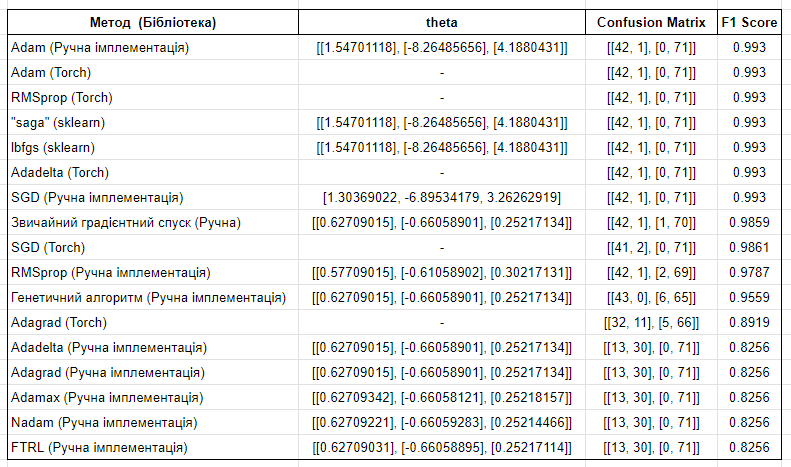